<a href="https://colab.research.google.com/github/AliceCalage79/Relatorio_Software/blob/main/Relatorio_emp_software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = red> Análise Exploratória : Dados de Horas Trabalhadas em uma Empresa de Software ✍

## <font color = red>* Objetivos::
---
O projeto visa a realização de uma análise exploratória de dados de uma empresa de software, mas precisamente de uma tabela com os registros de horários e tarefas de um funcionário durante uma semana:


*   Análise descritiva das características dos dados, registros, tipos de dados
    e valores;
*   Limpar e tratar os dados;

*   Utilizar e visualizar gráficos com o objetivo de obter alguns insights.

Algumas perguntas para direcionar a análise:

  - Como está a produtividade desse funcionário?
  - Será que o índice de horas trabalhadas aconhpanha o de tarefas concluídas?




- <font color= red> Imagem da tabela a ser trabalhada no relatório

![Imgur](https://i.imgur.com/XRkaVce.png)

---

## <font color = red>* Importando as bibliotecas

In [28]:
# Pacotes de bibliotecas que serão usadas no projeto:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# versões dos pacotes:
print('Pacotes Instalados! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
# definindo o backend do matplotlib no arquivo jupyter
%matplotlib inline


Pacotes Instalados! Versões Utilizadas:

Pandas      --> 1.5.3
Numpy       --> 1.22.4
Matplotlib  --> 3.7.1


---

## <font color = red> * Importanto Tb_trabalho.csv
- Tb_trabalho possui os dados que serão trabalhados no projeto do Relatorio_emp_software, esse arquivo esta armazenado no diretório do projeto no GitHub


In [29]:
data = 'https://raw.githubusercontent.com/AliceCalage79/Relatorio_Software/main/Dados_csv/Tb_trabalho.csv'
dataframe =pd.read_csv(data)
dataframe

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas
0,Segunda,6,3,5
1,Terça,7,2,4
2,Quarta,8,1,6
3,Quinta,6,4,4
4,Sexta,7,3,5
5,Sábado,5,2,3
6,Domingo,4,1,2


  - Tabela criada de acordo com os dados disponibilizados pela empresa.
  

---

## <font color = red>* Vizualização e dimensões dos registros, com os tipos de dados

In [30]:
# aqui estao os 5 primeiros dias da semana com os dados carregados, para uma primeira vizualização
dataframe.head()

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas
0,Segunda,6,3,5
1,Terça,7,2,4
2,Quarta,8,1,6
3,Quinta,6,4,4
4,Sexta,7,3,5


- O dataframe está com os dados que serão trabalhados na análise, aqui estão através do head os 5 primeiros registros;

- Atraves do shape da tabela, ver o as dimensões do DataSet que será trabalhado;

In [31]:
dataframe.shape

(7, 4)

- Tem 7 registros (linhas)
- com 4 variáveis (colunas)

In [32]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dia                 7 non-null      object
 1   Horas Trabalhadas   7 non-null      int64 
 2   Bugs Corrigidos     7 non-null      int64 
 3   Tarefas Concluídas  7 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 352.0+ bytes


- Aqui temos as informações dos tipos de dados, podemos perceber também que não temos registros nulos

---

<font color=red> *Análise estatistíca da tabela
- Os dados foram coletados durante uma semana de trabalho de segunda á domingo;
- Com as seguintes variáveis:
     - `Horas trabalhadas;`
     - `Bugs Corrígidos;`
     - `Tarefas Concluídas.`

---

## <font color = red> *Funções

- Função gera_grafico
   - Utilizada para gerar gráfico de linha;

In [33]:
# grafico com o número de horas ao longo da semana
def gera_grafico(x,y,titulo,legenda,ylabel,cor):
 plt.style.use('dark_background')
 plt.figure(figsize = (6,3))
#plt.plot(dia,hora_trab, color = 'green', label = "Linha que mostra o numero de horas trabalhada x dia")
 plt.plot(x , y, color=cor, ls='-', lw='1', marker='o')
 plt.title(titulo)
 plt.grid(False)
 plt.box(True)
 plt.legend(legenda)
 plt.xlabel("Dias da semana trabalhados")
 plt.ylabel(ylabel)

- Função format
     - Utilizada para formatar float em %.2f

In [34]:
# foi criada uma função lambda para formatar os números
format=lambda x : '%.2f' % x

- Função print_estatistico
    - Utilizado para printar os dados estatisticos;

In [35]:
# função para mostrar os dados estatisticos do dataset
def print_estatistico(indice,valor):
    print ('***' *30)
    print(f'Máximo de ' + (indice) + ' em um dia :  '+  format(valor.max()))
    print ('---'*30)
    print(f'Mínimo de ' + (indice) + ' em um dia : '+ format(valor.min()))
    print ('---'*30)
    print(f'Total de dias contabilizados: '+ format(valor.count()))
    print ('---'*30)
    print(f'Média de diária de ' + (indice) + ': '+ format(valor.mean()))
    print ('---'*30)
    print(f'Total de '+(indice) +' na semana: ' +format(valor.sum()))
    print ('***' *30)

---

## <font color = red> *Trabalhando os dados:

### <font color = blue> Produtividade Diária

- Adiconado ao DataSet uma coluna chamada 'produt_diaria' que vai guardar a variavel produtividade diaria ao longo da semana;
- Calculando a produtividade diária 'Tarefas Concluídas' / 'Horas Trabalhadas'

In [36]:
# calculando a produtividade diaria
dataframe['produt_diaria']=dataframe['Tarefas Concluídas']/dataframe['Horas Trabalhadas']


- Aqui obtivemos os resultados da produtividade diaria durante a semana;

- Foi chamada a função format para formatar os numeros que estão muito extensos, facilitando a vizualização

In [37]:
# vizualização do dataset
dataframe['produt_diaria'].apply(format)


0    0.83
1    0.57
2    0.75
3    0.67
4    0.71
5    0.60
6    0.50
Name: produt_diaria, dtype: object

- Aqui os dados ja estão com uma melhor vizualização;
- Abaixo uma lista com a produtividade diária durante a semana.

####<font color = blue> Gráfico de Produtividade Diária

- Chamando a função gera_gráfico

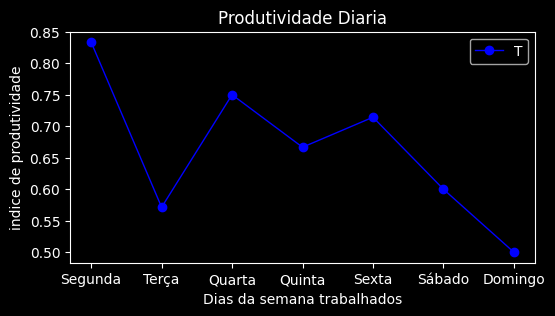

In [38]:
#chamando a função gera_grafico
gera_grafico(dataframe['Dia'], dataframe['produt_diaria'], 'Produtividade Diaria', 'Tarefa/Hora', 'indice de produtividade', 'blue')

- Relatório de produtividade diária

In [39]:
# usado um for para mostrar o print da produtividade diaria
for i in range(dataframe['Dia'].count()):
      print ('---'*30)
      print (f'Produtividade Diária de '+dataframe['Dia'][i]+ ' - feira : '  + format (dataframe['produt_diaria'][i]) + ' %')

------------------------------------------------------------------------------------------
Produtividade Diária de Segunda - feira : 0.83 %
------------------------------------------------------------------------------------------
Produtividade Diária de Terça - feira : 0.57 %
------------------------------------------------------------------------------------------
Produtividade Diária de Quarta - feira : 0.75 %
------------------------------------------------------------------------------------------
Produtividade Diária de Quinta - feira : 0.67 %
------------------------------------------------------------------------------------------
Produtividade Diária de Sexta - feira : 0.71 %
------------------------------------------------------------------------------------------
Produtividade Diária de Sábado - feira : 0.60 %
------------------------------------------------------------------------------------------
Produtividade Diária de Domingo - feira : 0.50 %


- Informações Importantes  <font color =blue> ---> 'Produtividade Diária'
    - --> Analisando o gráfico idendificamos que o dia com maior produtividade foi segunda - feira com 0.83;
    - --> O funcionário não tem um padrão diário de produtividade;
    - --> O dia da semana que menos produziu foi domingo 0.50;

- Abaixo a produtividade semanal

In [40]:
produt_semanal = dataframe['Tarefas Concluídas'].sum()/dataframe['Horas Trabalhadas'].sum()
print ('***' *30)
print (f'Produtividade Semanal: '+ format(produt_semanal)+ ' %')

******************************************************************************************
Produtividade Semanal: 0.67 %


### <font color = red> Horas Trabalhadas:

####<font color =red> Gráfico de Horas Trabalhadas

- Ulizando a função gera_grafico

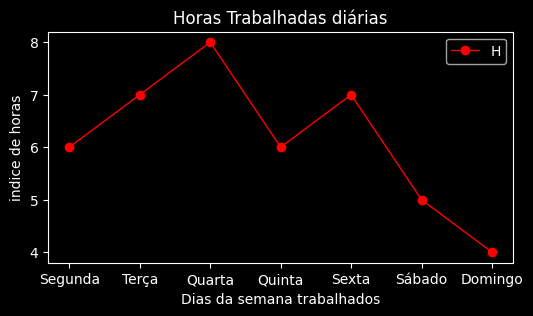

In [41]:
gera_grafico(dataframe['Dia'], dataframe['Horas Trabalhadas'], 'Horas Trabalhadas diárias', 'Horas/dias', 'indice de horas','red')

- Estatistíca de Horas Trabalhadas:
  - Chamando a função 'print_estatistico', para obter os dados de horas trabalhadas.

In [42]:
print_estatistico('horas trabalhadas',dataframe['Horas Trabalhadas'])

******************************************************************************************
Máximo de horas trabalhadas em um dia :  8.00
------------------------------------------------------------------------------------------
Mínimo de horas trabalhadas em um dia : 4.00
------------------------------------------------------------------------------------------
Total de dias contabilizados: 7.00
------------------------------------------------------------------------------------------
Média de diária de horas trabalhadas: 6.14
------------------------------------------------------------------------------------------
Total de horas trabalhadas na semana: 43.00
******************************************************************************************


- Informações Importantes  <font color =red> ---> 'Horas Trabalhadas'
    - --> Analisando o gráfico idendificamos que o dia com mais horas trabalhadas foi quarta - feira com 8hs;
    - --> O funcionário não tem um padrão diário de horas trabalhadas;
    - --> O dia da semana com menos horas foi domingo 4hs;

### <font color=yellow> Bugs Corrigidos

####<font color =yellow> Gráfico Bugs Corrigidos

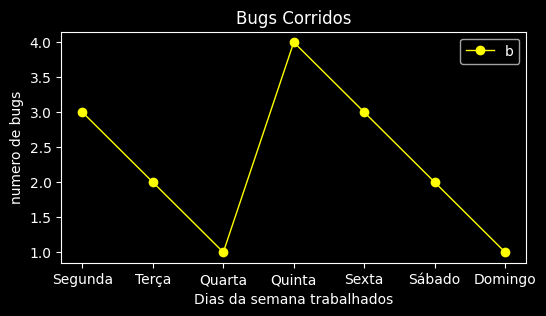

In [43]:
# utilizando a função gera_grafico
gera_grafico( dataframe ['Dia'], dataframe ['Bugs Corrigidos'], 'Bugs Corridos', 'bugs/dia', 'numero de bugs', 'yellow')

In [44]:
#utilizando a função print_estatistico
print_estatistico('bugs corrigidos',dataframe['Bugs Corrigidos'])

******************************************************************************************
Máximo de bugs corrigidos em um dia :  4.00
------------------------------------------------------------------------------------------
Mínimo de bugs corrigidos em um dia : 1.00
------------------------------------------------------------------------------------------
Total de dias contabilizados: 7.00
------------------------------------------------------------------------------------------
Média de diária de bugs corrigidos: 2.29
------------------------------------------------------------------------------------------
Total de bugs corrigidos na semana: 16.00
******************************************************************************************


- Informações Importantes  <font color =yellow> ---> 'Bugs Corrigidos'
    - --> Analisando o gráfico idendificamos que o dia com mais bugs corrigidos foi quinta - feira com <font color = yellow> (4);
    - --> O funcionário não tem um padrão diário de bugs corrigidos;
    - --> O dia da semana com menos bugs corrigidos foi domingo <font color = yellow>(1);

### <font color = orange> Tarefas Concluídas

####<font color = orange> Gráfico de Tarefas Concluídas

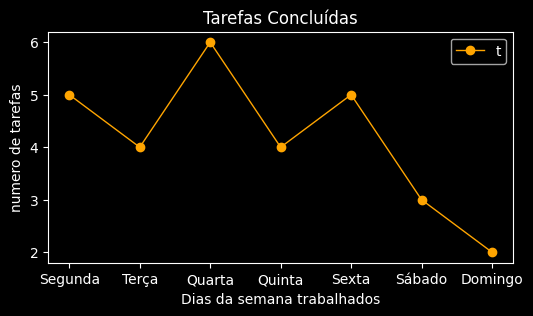

In [45]:
#função gera_grafico
gera_grafico( dataframe ['Dia'], dataframe ['Tarefas Concluídas'], 'Tarefas Concluídas', 'tarefas/dia', 'numero de tarefas', 'orange')

In [46]:
#função print estatistico
print_estatistico('tarefas concluídas',dataframe['Tarefas Concluídas'])

******************************************************************************************
Máximo de tarefas concluídas em um dia :  6.00
------------------------------------------------------------------------------------------
Mínimo de tarefas concluídas em um dia : 2.00
------------------------------------------------------------------------------------------
Total de dias contabilizados: 7.00
------------------------------------------------------------------------------------------
Média de diária de tarefas concluídas: 4.14
------------------------------------------------------------------------------------------
Total de tarefas concluídas na semana: 29.00
******************************************************************************************


- Informações Importantes  <font color =orange> ---> 'Tarefas Concluídas'
    - --> Analisando o gráfico idendificamos que o dia com mais tarefas concluidas foi quarta - feira com <font color = orange> (6);
    - --> O funcionário não tem um padrão diário de tarefas concluidas;
    - --> O dia da semana com menos tarefas concluidas foi domingo <font color = orange>(2);

### <font color = green> Médias

- Usando um Dataframe auxiliar para pegar as médias dos indicadores

In [47]:
df_aux =dataframe.describe()
df_aux =df_aux.T

In [48]:
df_aux['mean']

Horas Trabalhadas     6.142857
Bugs Corrigidos       2.285714
Tarefas Concluídas    4.142857
produt_diaria         0.662245
Name: mean, dtype: float64

#### <font color = green>Gráfico de Médias

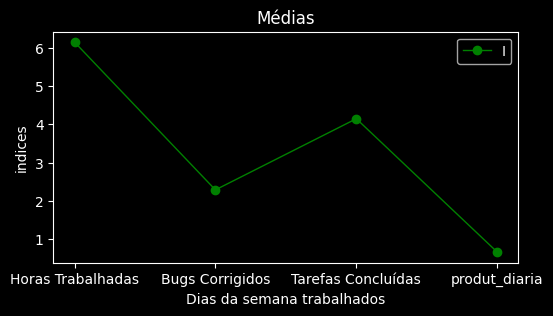

In [49]:
gera_grafico(df_aux.index ,df_aux['mean'],'Médias','Indicadores','indices','green')

- Informações Importantes  <font color =green> ---> 'Hipóteses'
    - --> Analisando o gráfico idendificamos que a média de horas trabalhadas é a mais alta, porém náo quer dizer que a produtividade desse funcionario seja alta, pois a média de tarefas concluidas esta bem abaixo, o que derruba a média de produtividade diaria para menos de 1% ;
    - --> Tambem conseguimos perceber que a media de bugs corridos é quase a metade da media de tarefas concluídas;
    - --> Não existe padrão entre as médias;

### Gráficos com os índices de todos os indicadores

Text(0, 0.5, 'Números dos indicadores')

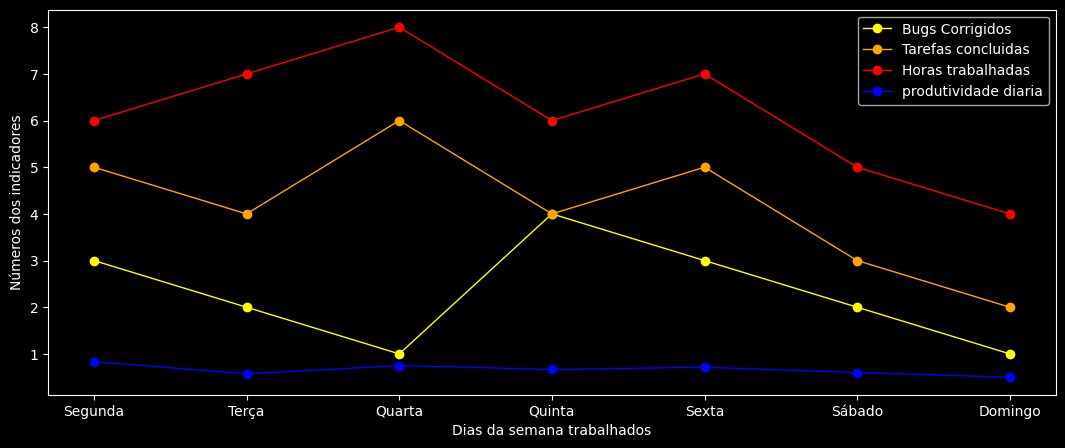

In [50]:
plt.style.use('dark_background')
plt.figure(figsize = (13,5))
#plt.plot(dia,hora_trab, color = 'green', label = "Linha que mostra o numero de horas trabalhada x dia")
#plt.subplot(1,2,1)
plt.plot(dataframe['Dia'],dataframe['Bugs Corrigidos'], label = 'Bugs Corrigidos',color='yellow', ls='-', lw='1', marker='o')
plt.plot(dataframe['Dia'],dataframe['Tarefas Concluídas'], label = 'Tarefas concluidas',color='orange', ls='-', lw='1', marker='o')
plt.plot(dataframe['Dia'],dataframe['Horas Trabalhadas'],label = 'Horas trabalhadas', color='red', ls='-', lw='1', marker='o')
plt.plot(dataframe['Dia'],dataframe['produt_diaria'],label = 'produtividade diaria', color='blue', ls='-', lw='1', marker='o')
plt.title("")
plt.grid(False)
plt.box(True)
plt.legend()
plt.xlabel("Dias da semana trabalhados")
plt.ylabel("Números dos indicadores")

- Informações Importantes  <font color =green> ---> 'Hipóteses'
    - --> Analisando o gráfico idendificamos que na segunda feira foi o dia mais produtivo do funcionário, pois mesmo não sendo o dia que trabalhou mais horas o número de tarefas concluídas aconpanhou o indice de horas trabalhadas o que gerou o indicador de produtividade diária mais alto da semana.
    - --> O gráfico tambem permitiu vizualizar que o dia menos produtivo é domingo, pois possui os índices todos bem baixos;
    - --> Quarta feira apesar de ser o dia com ídice de horas trabalhadas mais alto e o de tarefas concluídas tambem alto, o de bugs corrigido foi muito baixo;
    ### <font color = green> --> Insights <font color = white>
    - Acredito que domingo possa ser tirado da semana de trabalho, pois o índice de produtividade diária é muito baixo, não prejudicando o desenvolvimento do projeto;
    - Talves uma distribuição melhor de horários aumentasse um pouco mais a produtividade diária;
    - os bugs corrigidos poderiam ser melhor distribuidos durante a semana.